In [1]:
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import re

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

def check_metrics(true_val, pred_val):
    print("Accuracy: ", accuracy_score(true_val, pred_val))
    print("Roc_Auc: ", roc_auc_score(true_val, pred_val))
    print("Precision: ", precision_score(true_val, pred_val), " - процент правильно токсичных")
    print("Recall: ", recall_score(true_val, pred_val), " - процент выбранных токсичных")

data = pd.read_csv("toxic_train.csv")

test_data = pd.read_csv("toxic_test.csv")


train_texts = np.array(data['comment_text'])
test_texts = np.array(test_data['comment_text'])

for enum in range(train_texts.__len__()):
    train_texts[enum] = train_texts[enum].lower()
    train_texts[enum] = re.sub("[^0-9a-zA-Z]+", ' ', train_texts[enum])
    train_texts[enum] =  re.sub(' +', ' ', train_texts[enum])


    
test_texts = np.array(test_data['comment_text'])
for enum in range(test_texts.__len__()):
    test_texts[enum] = test_texts[enum].lower()
    test_texts[enum] = re.sub("[^0-9a-zA-Z]+", ' ', test_texts[enum])
    test_texts[enum] =  re.sub(' +', ' ', test_texts[enum])


train_target = np.array(data['is_toxic']).astype(int) * 2 - 1 
test_target = np.array(test_data['is_toxic']).astype(int) * 2 - 1



In [3]:
from sklearn.feature_extraction.text import CountVectorizer

Посмотрим для различных значений min_df у векторизатора:

In [4]:
vect = CountVectorizer(min_df=20, stop_words='english')

In [5]:
train_matrix = vect.fit_transform(train_texts)
test_matrix = vect.transform(test_texts)

In [6]:
from optim import GDClassifier

In [8]:
classifier = GDClassifier(loss_function = '', step_alpha = 3.4, l2_coef = 0)

In [9]:
%time classifier.fit(train_matrix, train_target)

CPU times: user 16.8 s, sys: 2.67 s, total: 19.5 s
Wall time: 19.5 s


In [10]:
check_metrics(test_target, classifier.predict(test_matrix))

8232
Accuracy:  0.8545656800154768
Roc_Auc:  0.872696547133413
Precision:  0.6965500485908649  - процент правильно токсичных
Recall:  0.9184686849271184  - процент выбранных токсичных


In [12]:
accuracy = []
holder = []
for i in range(1, 51):
    classifier = GDClassifier(loss_function = '', step_alpha = i / 10, l2_coef = 0, max_iter = 100)
    holder.append(classifier.fit(train_matrix, train_target, trace = True))
    accuracy.append(accuracy_score(test_target, classifier.predict(test_matrix)))

4967
5802
6253
6534
6703
6820
6924
7009
7089
7141
7184
7235
7281
7317
7348
7383
7412
7440
7471
7491
7507
7531
7551
7569
7583
7595
7608
7624
7635
7646
7652
7674
7688
7694
7702
7707
7717
7731
7728
7737
7745
7765
7770
7770
7780
7786
7793
7799
7805
7816


In [13]:
np.argmax(accuracy)

49

In [14]:
time_cumsum = np.cumsum(holder[34]['time'])

In [15]:
loss_cumsum = np.array(holder[34]['func'])

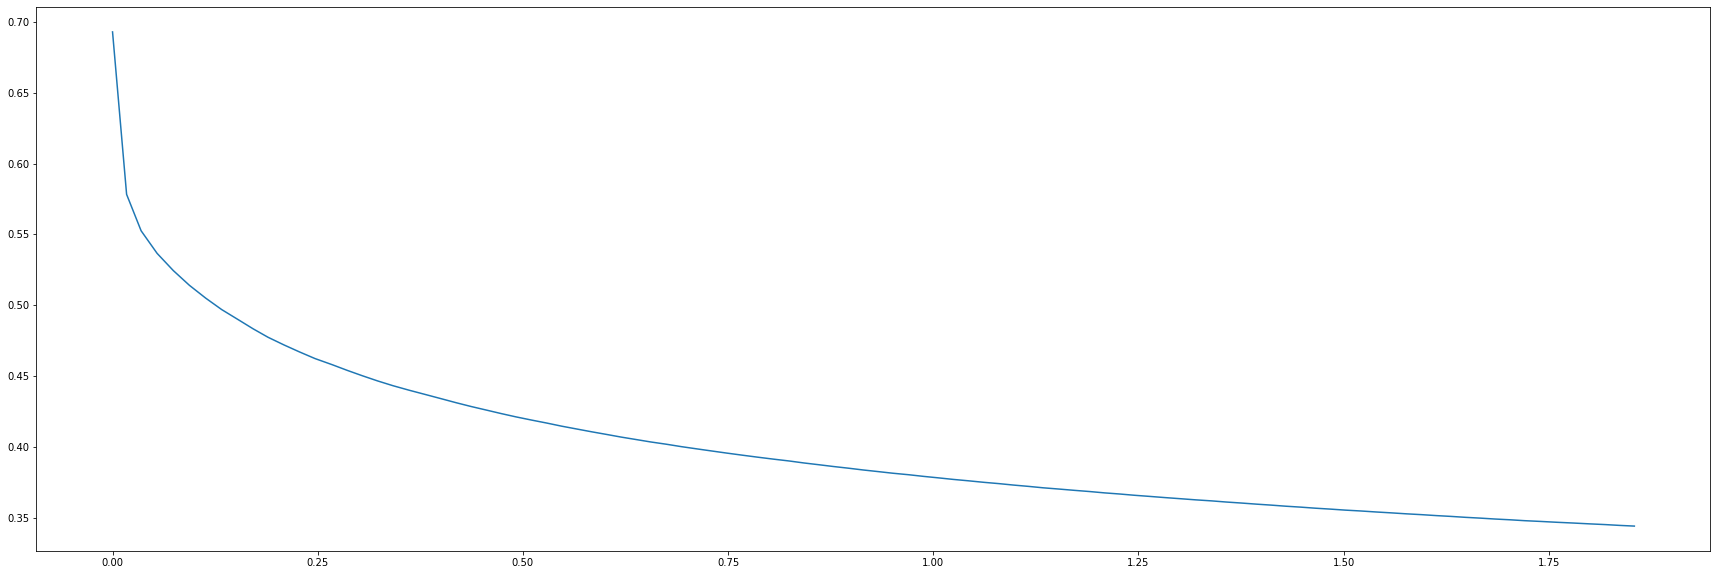

In [16]:
fig = plt.figure(figsize=[30, 10])

plt.plot(time_cumsum, loss_cumsum)

In [17]:
times_sum = [np.sum(holder[i]['time']) for i in range(50)]

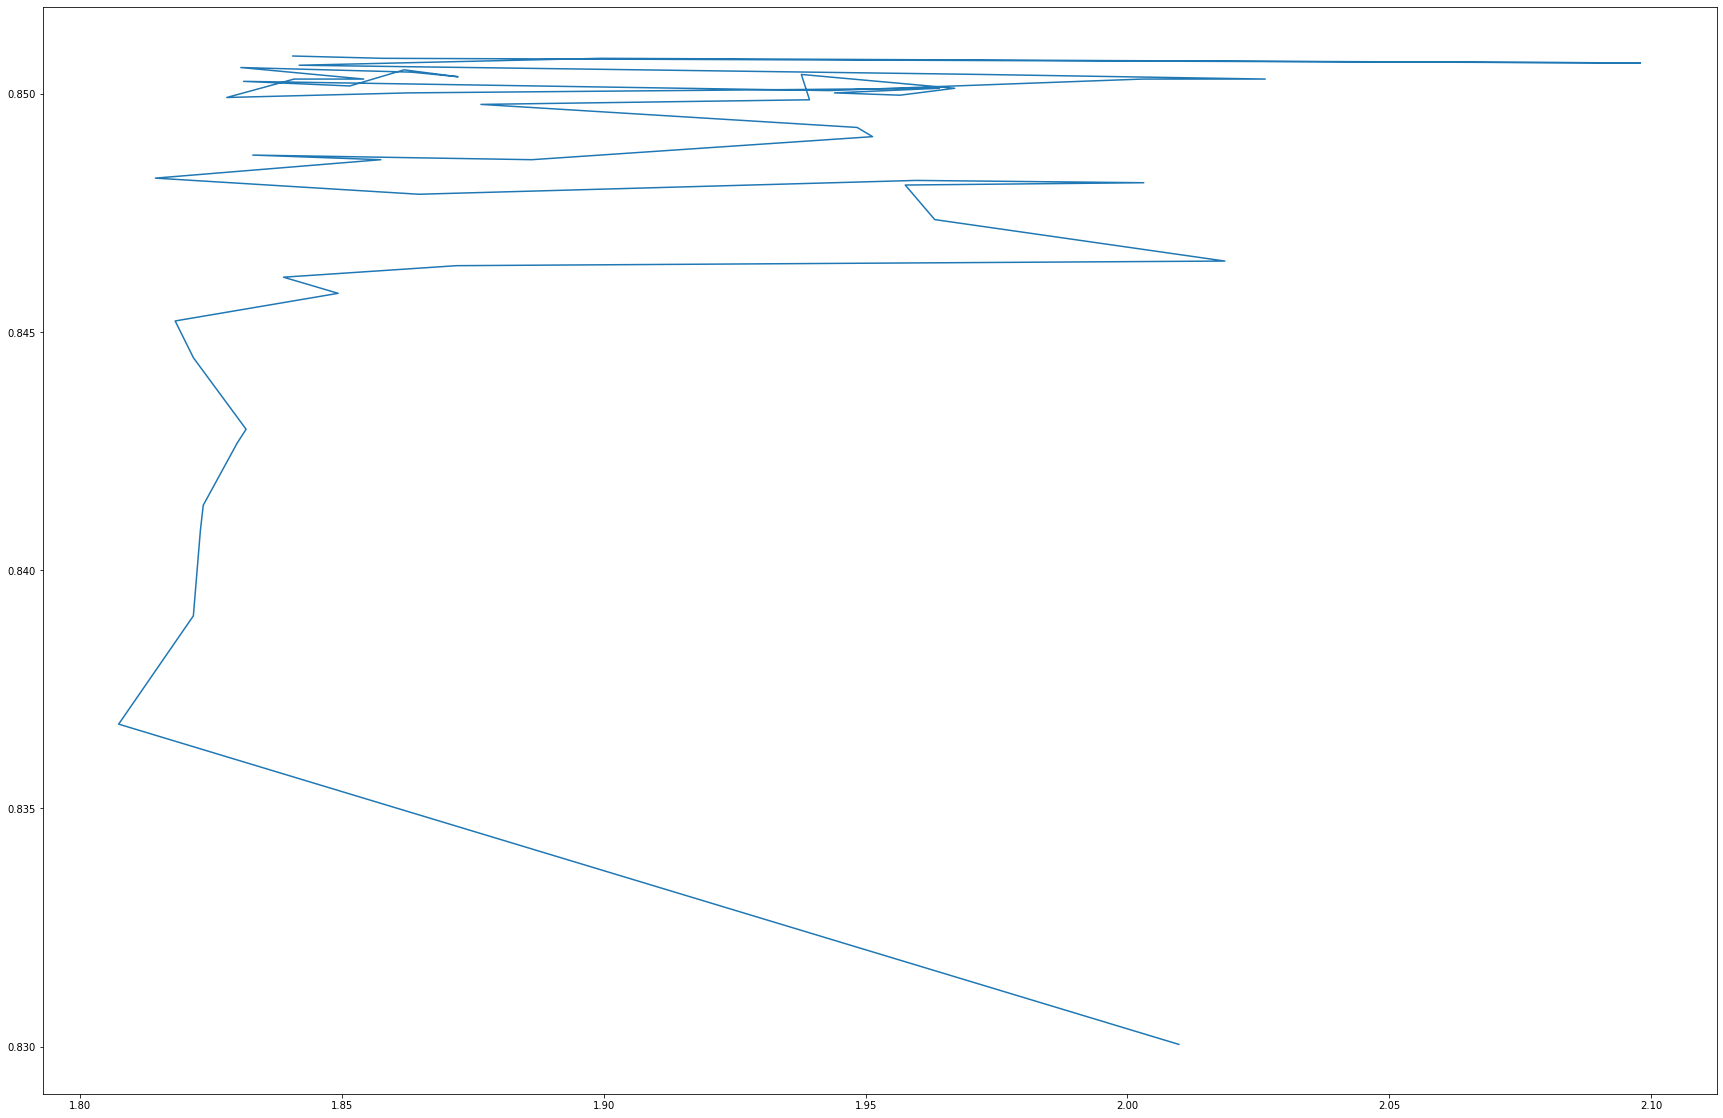

In [18]:
fig = plt.figure(figsize=[30, 20])

plt.plot(times_sum, accuracy)

In [19]:
np.argmax(accuracy)

49

In [21]:
accuracy

[0.8300444960340492,
 0.8367672663958212,
 0.8390404333526794,
 0.8408299477655252,
 0.8413619655639388,
 0.8426678274327722,
 0.8429580189591798,
 0.8444573418456182,
 0.845231185916038,
 0.8458115689688528,
 0.8461501257496614,
 0.8463919520216676,
 0.8464886825304702,
 0.8473592571096924,
 0.848084735925711,
 0.8481331011801122,
 0.8481814664345134,
 0.847891274908106,
 0.8482298316889146,
 0.8486167537241246,
 0.848713484232927,
 0.8486167537241246,
 0.849100406268137,
 0.849293867285742,
 0.8497775198297544,
 0.8498742503385568,
 0.8504062681369704,
 0.850116076610563,
 0.8499709808473592,
 0.8500193461017604,
 0.850116076610563,
 0.8500193461017604,
 0.849922615592958,
 0.850309537628168,
 0.850309537628168,
 0.8505513639001742,
 0.8504546333913716,
 0.8503579028825692,
 0.8505029986457728,
 0.8501644418649642,
 0.8502611723737666,
 0.8500677113561618,
 0.850309537628168,
 0.850309537628168,
 0.8504062681369704,
 0.8505997291545754,
 0.850744824917779,
 0.8506480944089766,
 0.850

Text(0, 0.5, 'Accuracy')

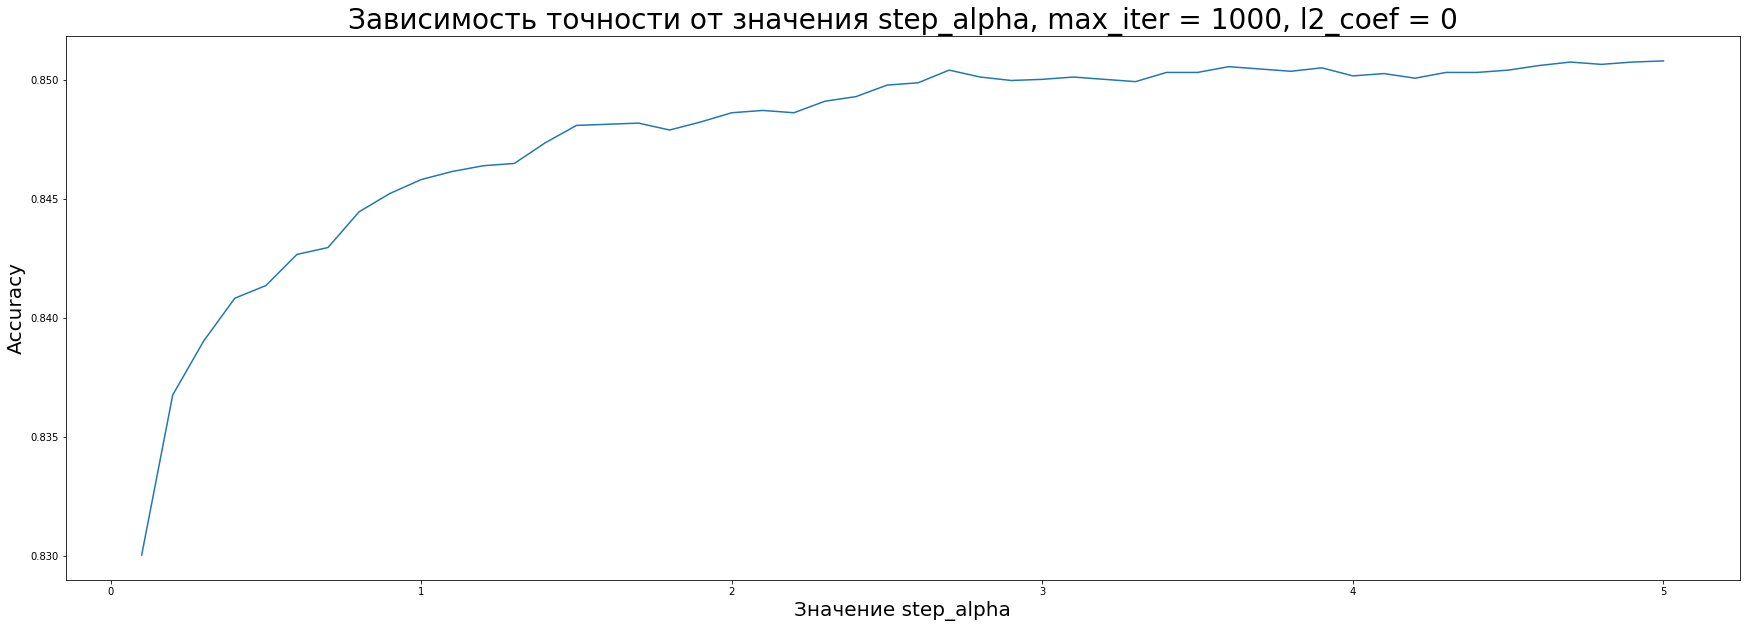

In [22]:
fig = plt.figure(figsize=[30, 10])

plt.plot(np.arange(1,51) * 0.1, accuracy)
plt.title("Зависимость точности от значения step_alpha, max_iter = 1000, l2_coef = 0", fontsize=28)
plt.xlabel("Значение step_alpha", fontsize=20)
plt.ylabel("Accuracy",fontsize=20)

